In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the final merged dataset
final_data = pd.read_csv('final_merged_data.csv')

# Convert 'Date' column to datetime format for proper sorting
final_data['Date'] = pd.to_datetime(final_data['Date'])

# Sort the data by 'Date' to ensure correct chronological order
final_data = final_data.sort_values(by='Date').reset_index(drop=True)

In [46]:
# Define the features and target variable
features = [ 'Open', 'Low', 'High', 'DailyChange',
            'GDP_Growth_Rate(Annual Average %)', 'Inflation_Rates(%)',
            'Price_EUR(Quartly Crude Oil Prices)', 'Unemployment_Rate(Annual Average %)']
target = 'Price_MA_7'

# Split the data into features (X) and target (y)
X = final_data[features]
y = final_data[target]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model with regularization parameters
rf_model = RandomForestRegressor(
    n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42
)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}, R-squared: {r2_rf:.2f}")

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.05, max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42
)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - Mean Squared Error: {mse_gb:.2f}, R-squared: {r2_gb:.2f}")

# XGBoost Model
xgb_model = XGBRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, random_state=42
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - Mean Squared Error: {mse_xgb:.2f}, R-squared: {r2_xgb:.2f}")

Random Forest - Mean Squared Error: 7.43, R-squared: 0.62
Gradient Boosting - Mean Squared Error: 7.22, R-squared: 0.63
XGBoost - Mean Squared Error: 6.65, R-squared: 0.66


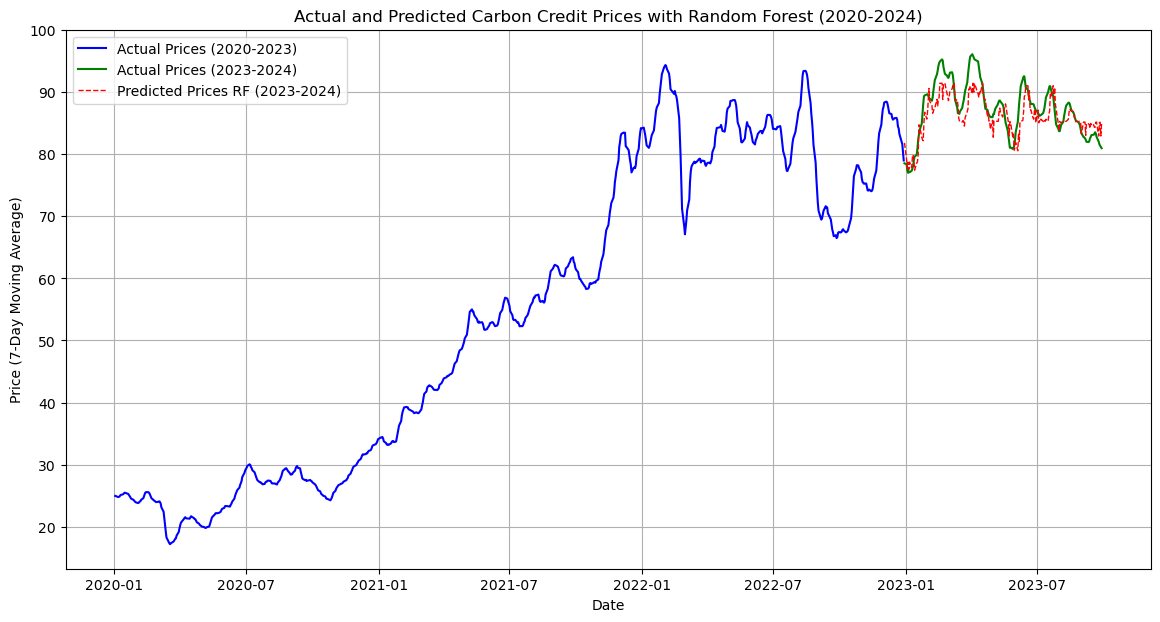

In [48]:
# Plot Random Forest Results
plt.figure(figsize=(14, 7))

# Plot actual prices for the first 80% (training data)
plt.plot(final_data['Date'][:len(y_train)], y_train, label='Actual Prices (2020-2023)', color='blue', linewidth=1.5)

# Plot actual prices for the last 20% (test data)
plt.plot(final_data['Date'][len(y_train):], y_test, label='Actual Prices (2023-2024)', color='green', linewidth=1.5)

# Plot predicted prices for the last 20% (test data)
plt.plot(final_data['Date'][len(y_train):], y_pred_rf, label='Predicted Prices RF (2023-2024)', color='red', linestyle='--', linewidth=1)

plt.title('Actual and Predicted Carbon Credit Prices with Random Forest (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price (7-Day Moving Average)')
plt.legend()
plt.grid(True)
plt.show()

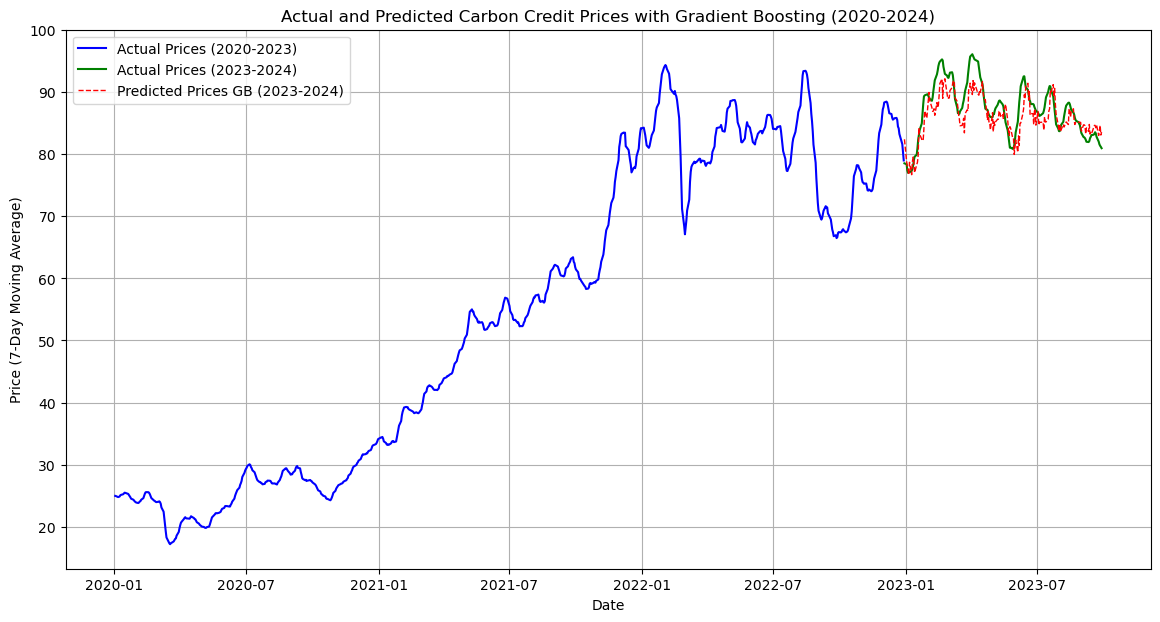

In [49]:
plt.figure(figsize=(14, 7))
plt.plot(final_data['Date'][:len(y_train)], y_train, label='Actual Prices (2020-2023)', color='blue', linewidth=1.5)
plt.plot(final_data['Date'][len(y_train):], y_test, label='Actual Prices (2023-2024)', color='green', linewidth=1.5)
plt.plot(final_data['Date'][len(y_train):], y_pred_gb, label='Predicted Prices GB (2023-2024)', color='red', linestyle='--', linewidth=1)
plt.title('Actual and Predicted Carbon Credit Prices with Gradient Boosting (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price (7-Day Moving Average)')
plt.legend()
plt.grid(True)
plt.show()

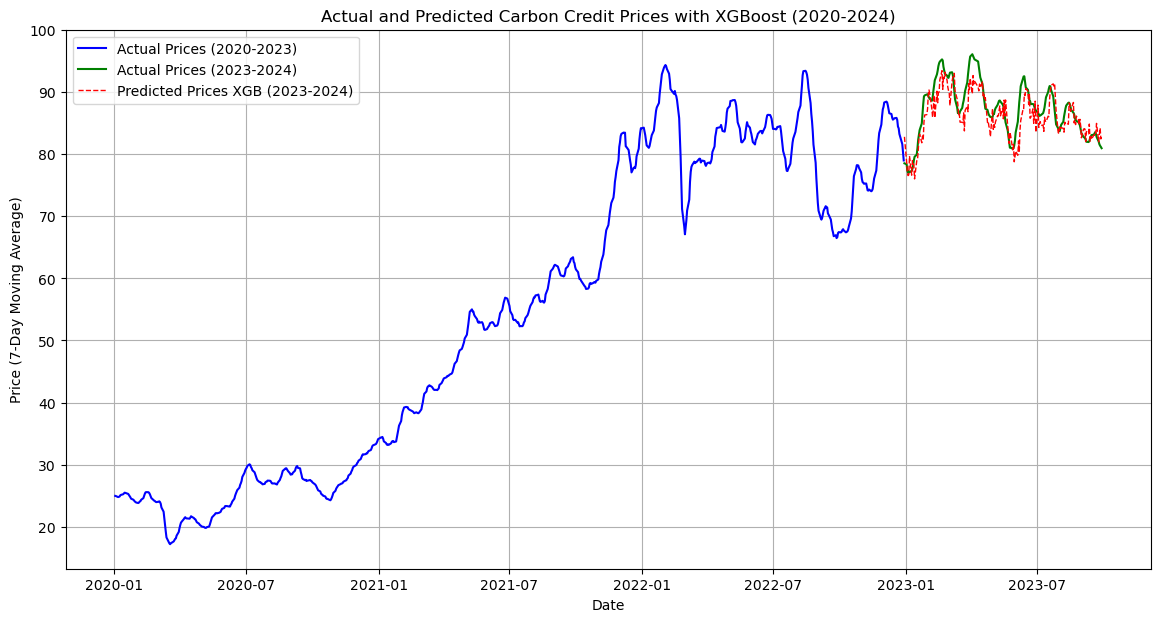

In [50]:
plt.figure(figsize=(14, 7))
plt.plot(final_data['Date'][:len(y_train)], y_train, label='Actual Prices (2020-2023)', color='blue', linewidth=1.5)
plt.plot(final_data['Date'][len(y_train):], y_test, label='Actual Prices (2023-2024)', color='green', linewidth=1.5)
plt.plot(final_data['Date'][len(y_train):], y_pred_xgb, label='Predicted Prices XGB (2023-2024)', color='red', linestyle='--', linewidth=1)
plt.title('Actual and Predicted Carbon Credit Prices with XGBoost (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price (7-Day Moving Average)')
plt.legend()
plt.grid(True)
plt.show()